In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [3]:
df = pd.read_csv('./AirlineSentimentTweets.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [6]:
df['sentiment_labels'] = df['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

In [7]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment_labels
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01
sentiment_labels,14640.0,5.344945e-01,7.560842e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00


In [9]:
Y = df['sentiment_labels'].values

In [10]:
Y

array([1, 2, 1, ..., 1, 0, 1], dtype=int64)

In [11]:
X = df['text'].values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [13]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [14]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 12430 unique tokens.


In [15]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (9808, 33)


In [16]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (4832, 33)


In [17]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [18]:
print('Train Set ->', data_train.shape, y_train.shape)
print('Validation Set ->', data_test.shape, y_test.shape)

Train Set -> (9808, 33) (9808,)
Validation Set -> (4832, 33) (4832,)


In [94]:
# Create the model

# We get to choose embedding dimensionality
D = 30

# Hidden state dimensionality
M = 30

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(3, activation='softmax')(x)

model = Model(i, x)

In [95]:
print(model.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 33)]              0         
                                                                 
 embedding_8 (Embedding)     (None, 33, 30)            372930    
                                                                 
 lstm_8 (LSTM)               (None, 33, 30)            7320      
                                                                 
 global_max_pooling1d_8 (Glo  (None, 30)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 3)                 93        
                                                                 
Total params: 380,343
Trainable params: 380,343
Non-trainable params: 0
_____________________________________________________

In [96]:
print(df[df['sentiment_labels'] == 0].size / df.size)
print(df[df['sentiment_labels'] == 1].size / df.size)
print(df[df['sentiment_labels'] == 2].size / df.size)

0.6269125683060109
0.21168032786885246
0.16140710382513662


In [97]:
negative_weight = 1 / df[df['sentiment_labels'] == 0].size / df.size
neutral_weight = 1 / df[df['sentiment_labels'] == 1].size / df.size
positive_weight = 1 / df[df['sentiment_labels'] == 2].size / df.size

In [98]:
# Compile and fit
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  y_train,
  epochs=5,
  validation_data=(data_test, y_test),
)

Training model...
Epoch 1/5
307/307 [==============================] - 6s 15ms/step - loss: 0.8025 - accuracy: 0.6563 - val_loss: 0.6241 - val_accuracy: 0.7330
Epoch 2/5
307/307 [==============================] - 4s 13ms/step - loss: 0.5280 - accuracy: 0.7962 - val_loss: 0.5465 - val_accuracy: 0.7881
Epoch 3/5
307/307 [==============================] - 4s 13ms/step - loss: 0.3594 - accuracy: 0.8687 - val_loss: 0.5176 - val_accuracy: 0.8007
Epoch 4/5
307/307 [==============================] - 4s 13ms/step - loss: 0.2473 - accuracy: 0.9152 - val_loss: 0.5470 - val_accuracy: 0.7988
Epoch 5/5
307/307 [==============================] - 4s 13ms/step - loss: 0.1758 - accuracy: 0.9438 - val_loss: 0.6247 - val_accuracy: 0.7781


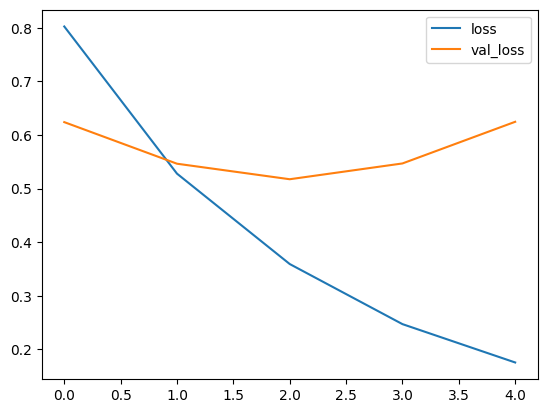

In [99]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

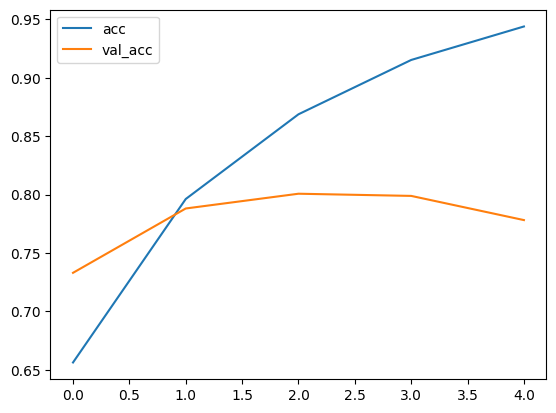

In [100]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [101]:
sentiment_dict = {0: 'Negative', 1:'Neutral', 2: 'Positive'}

151/151 [==============================] - 1s 2ms/step
[2 0 0 ... 0 0 1]
[2 1 0 ... 0 0 1]
Confusion matrix, without normalization
[[2638  361   83]
 [ 282  643   71]
 [ 128  147  479]]


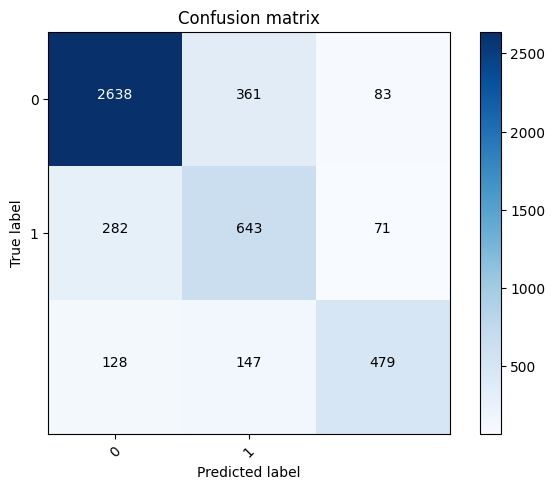

In [102]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(data_test).argmax(axis=1)
print(y_test)
print(p_test)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(2)))

307/307 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[5977  105   14]
 [  65 1989   49]
 [  23   74 1512]]


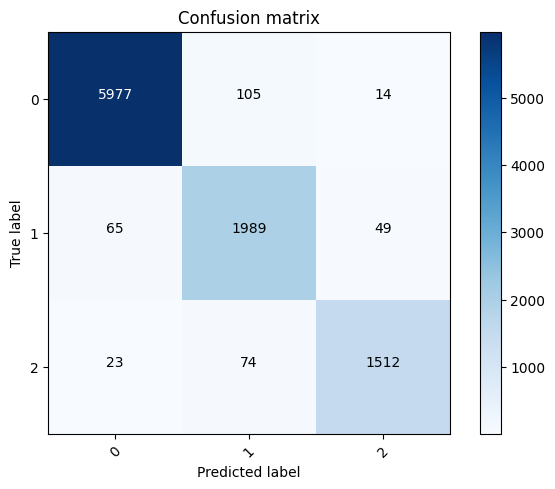

In [103]:
p_train = model.predict(data_train).argmax(axis=1)
cm = confusion_matrix(y_train, p_train)
plot_confusion_matrix(cm, [0, 1, 2])

In [104]:
### Make predictions on a new test sentence ###
test_sent = df[df['sentiment_labels'] == 2].sample()['text'].values
# test_sent = ['Not heard from U4 a while. Call 4 rude chat private line']
print("Sentence:", test_sent)
test_seq = tokenizer.texts_to_sequences(test_sent)
test_seq

Sentence: ['@SouthwestAir I love this airline so much! Thanks so much! The service is great! The snacks are amazing! Everything is outstanding thanks!!']


[[16,
  3,
  147,
  29,
  100,
  47,
  183,
  38,
  47,
  183,
  2,
  43,
  14,
  123,
  2,
  1621,
  37,
  361,
  577,
  14,
  1501,
  38]]

In [105]:
test_padded = pad_sequences(test_seq, maxlen=T)
test_padded

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          16,    3,  147,   29,  100,   47,  183,   38,   47,  183,    2,
          43,   14,  123,    2, 1621,   37,  361,  577,   14, 1501,   38]])

In [106]:
# correctly identified as spam
prediction = model.predict(test_padded)

1/1 [==============================] - 0s 18ms/step


In [107]:
np.argmax(prediction)

2